In [1]:
from plot_helpers import *
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import stats 
import pandas as pd
import geopandas as gpd
import cartopy.crs as ccrs
from matplotlib.lines import Line2D
from scipy.stats import linregress
import matplotlib as mpl
from scipy.optimize import curve_fit

# Set global font sizes - for manuscript
mpl.rcParams['font.size'] = 20
mpl.rcParams['axes.labelsize'] = 28
mpl.rcParams['xtick.labelsize'] = 24
mpl.rcParams['ytick.labelsize'] = 24
mpl.rcParams['legend.fontsize'] = 18


In [5]:
# Load the statistics CSV file
combined_statistics_path = r"C:\Users\Feifei\Box\BR_remote_sensing\ebi_combined_statistics.csv"
df = pd.read_csv(combined_statistics_path)


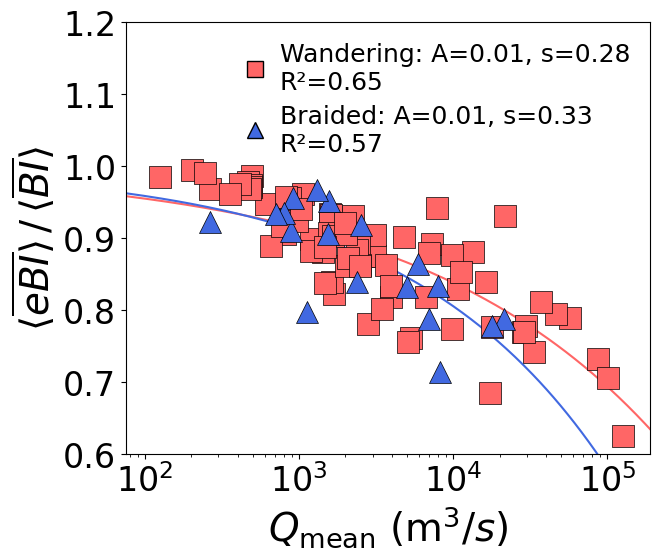

In [6]:
# Dynamically calculate x_range based on data (with padding)
x_range = (df['Qm'].min() * 0.6, df['Qm'].max() * 1.5)  # Add 10% padding

markers = {'Wandering': 's', 'B': '^'}
colors  = {'Wandering': '#FF6666', 'B': '#4169E1'}

# 3) Combine wandering classifications into one group
df['Group'] = df['Classification'].replace(['HSW','LSW'], 'Wandering')

# 4) Create the figure
fig, ax = plt.subplots(figsize=(7, 6))
legend_info = {}

# 5) Loop through each group to fit & plot bounded power-law
for grp in ['Wandering','B']:
    sub = df[df['Group'] == grp]
    x = sub['Qm'].values
    y = sub['eBI_BI_ratio_site'].values

    # scatter the raw points
    ax.scatter(x, y,
               marker=markers[grp],
               facecolor=colors[grp],
               edgecolor='black',
               s=250,
               alpha=1, zorder=2, linewidths=0.5)

    # fit y = 1 - A * x^s
    A, s, predict, r2 = fit_bounded_power(x, y, y0=1.0, return_r2=True)
    legend_info[grp] = (A, s, r2)

    # generate x_line across fixed x_range on log scale
    x_line = np.logspace(np.log10(x_range[0]), np.log10(x_range[1]), 300)
    y_line = predict(x_line)

    # plot the fitted curve
    ax.plot(x_line, y_line,
            color=colors[grp],
            lw=1.5,
            zorder=1)

# 6) Final styling
ax.set_xscale('log')
ax.set_xlim(*x_range)
ax.set_ylim(0.6, 1.2)
ax.set_xlabel(r'$Q_{\rm mean}\ (\mathrm{m}^3/s)$')
ax.set_ylabel(r'$\langle\overline{\mathit{eBI}}\rangle \,/\, \langle\overline{\mathit{BI}}\rangle$')

# 5) Build custom legend
handles = []
for grp, (A, s, r2) in legend_info.items():
    name = 'Wandering' if grp=='Wandering' else 'Braided'
    # no raw strings so '\n' is a real newline
    label = f"{name}: A={A:.2f}, s={s:.2f}\nR²={r2:.2f}"
    handles.append(
        Line2D([0],[0],
               marker=markers[grp], linestyle='None', color='w',
               markerfacecolor=colors[grp], markeredgecolor='black',
               markersize=12, label=label)
    )


ax.legend(handles=handles, loc='upper right', frameon=False,
          handlelength=1.0, handletextpad=0.5, borderpad=0.3, labelspacing=0.4)
plt.tight_layout()
plt.show()
fig.savefig(r"C:\Users\Feifei\Box\BR_remote_sensing\figures\5_eBI_BI_q.pdf", 
            format='pdf', dpi=500, bbox_inches='tight', transparent=True)


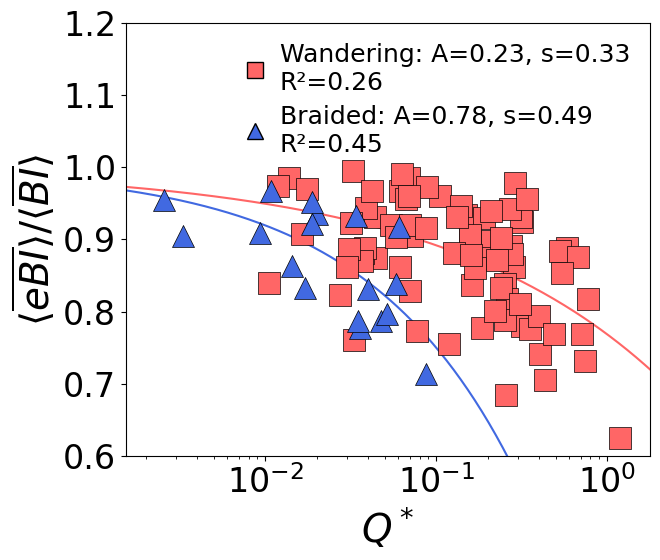

In [7]:
x_range = (df['dim_Q'].min() * 0.6, df['dim_Q'].max() * 1.5)


# 2) Styles
markers = {'Wandering': 's', 'B': '^'}
colors  = {'Wandering': '#FF6666', 'B': '#4169E1'}
df['Group'] = df['Classification'].replace(['HSW','LSW'], 'Wandering')

# 3) Prepare figure
fig, ax = plt.subplots(figsize=(7,6))
legend_info = {}

# 4) Loop through each group and plot
for grp in ['Wandering','B']:
    sub = df[df['Group'] == grp]
    x = sub['dim_Q'].values
    y = sub['eBI_BI_ratio_site'].values

    # scatter raw points
    ax.scatter(x, y,
               marker=markers[grp],
               facecolor=colors[grp],
               edgecolor='black',
               s=250,alpha=1, zorder=2, linewidths=0.5)

    # fit bounded power-law y=1–A x^s
    A, s, predict, r2 = fit_bounded_power(x, y, y0=1.0, return_r2=True)
    legend_info[grp] = (A, s, r2)

    # generate x_line over your fixed x_range on a log scale
    x_line = np.logspace(np.log10(x_range[0]), np.log10(x_range[1]), 300)
    y_line = predict(x_line)

    # plot the regression curve
    ax.plot(x_line, y_line,
            color=colors[grp],
            lw=1.5,
            zorder=1)

# 5) Build custom legend
handles = []
for grp, (A, s, r2) in legend_info.items():
    name = 'Wandering' if grp=='Wandering' else 'Braided'
    # no raw strings so '\n' is a real newline
    label = f"{name}: A={A:.2f}, s={s:.2f}\nR²={r2:.2f}"
    handles.append(
        Line2D([0],[0],
               marker=markers[grp], linestyle='None', color='w',
               markerfacecolor=colors[grp], markeredgecolor='black',
               markersize=12, label=label)
    )

# 6) Final formatting
ax.set_xscale('log')
ax.set_xlim(*x_range)
ax.set_ylim(0.6, 1.2)
ax.set_xlabel(r'$Q^*$')
ax.set_ylabel(r'$\langle\overline{\mathit{eBI}}\rangle/\langle\overline{\mathit{BI}}\rangle$')

ax.legend(handles=handles, loc='upper right', frameon=False,
          handlelength=1.0, handletextpad=0.5, borderpad=0.3, labelspacing=0.4)
plt.tight_layout()
plt.show()

fig.savefig(r"C:\Users\Feifei\Box\BR_remote_sensing\figures\5_eBI_BI_qdim.pdf", 
            format='pdf', dpi=500, bbox_inches='tight', transparent=True)

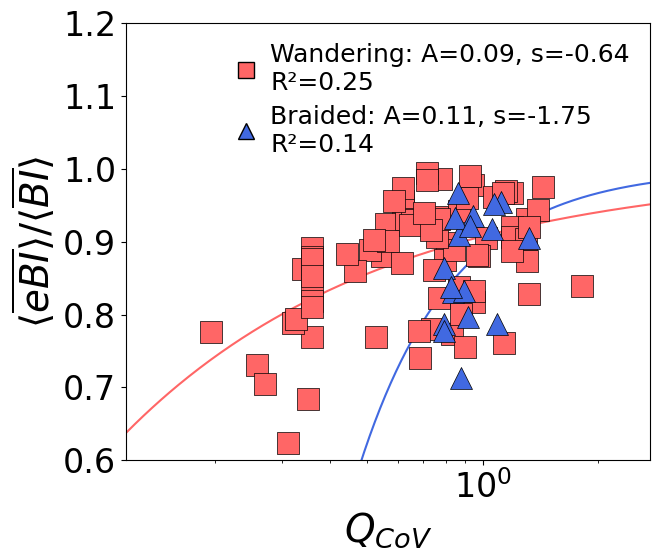

In [26]:
x_range = (df['cov_discharge_site'].min() * 0.6, df['cov_discharge_site'].max() * 1.5)


# 2) Styles
markers = {'Wandering': 's', 'B': '^'}
colors  = {'Wandering': '#FF6666', 'B': '#4169E1'}
df['Group'] = df['Classification'].replace(['HSW','LSW'], 'Wandering')

# 3) Prepare figure
fig, ax = plt.subplots(figsize=(7,6))
legend_info = {}

# 4) Loop through each group and plot
for grp in ['Wandering','B']:
    sub = df[df['Group'] == grp]
    x = sub['cov_discharge_site'].values
    y = sub['eBI_BI_ratio_site'].values

    # scatter raw points
    ax.scatter(x, y,
               marker=markers[grp],
               facecolor=colors[grp],
               edgecolor='black',
               s=250,
               alpha=1, zorder=2, linewidths=0.5)

    # fit bounded power-law y=1–A x^s
    A, s, predict, r2 = fit_bounded_power(x, y, y0=1.0, return_r2=True)
    legend_info[grp] = (A, s, r2)

    # generate x_line over your fixed x_range on a log scale
    x_line = np.logspace(np.log10(x_range[0]), np.log10(x_range[1]), 300)
    y_line = predict(x_line)

    # plot the regression curve
    ax.plot(x_line, y_line,
            color=colors[grp],
            lw=1.5,
            zorder=1)

handles = []
for grp, (A, s, r2) in legend_info.items():
    name = 'Wandering' if grp=='Wandering' else 'Braided'
    # no raw strings so '\n' is a real newline
    label = f"{name}: A={A:.2f}, s={s:.2f}\nR²={r2:.2f}"
    handles.append(
        Line2D([0],[0],
               marker=markers[grp], linestyle='None', color='w',
               markerfacecolor=colors[grp], markeredgecolor='black',
               markersize=12, label=label)
    )

# 6) Final formatting
ax.set_xscale('log')
ax.set_xlim(*x_range)
ax.set_ylim(0.6, 1.2)
ax.set_xlabel(r'${Q_{CoV}}$')
ax.set_ylabel(r'$\langle\overline{\mathit{eBI}}\rangle/\langle\overline{\mathit{BI}}\rangle$')

ax.legend(handles=handles, loc='upper right', frameon=False,
          handlelength=1.0, handletextpad=0.5, borderpad=0.3, labelspacing=0.4)
plt.tight_layout()
plt.show()

fig.savefig(r"C:\Users\Feifei\Box\BR_remote_sensing\figures\supp_eBI_cov_q.pdf", 
            format='pdf', dpi=500, bbox_inches='tight', transparent=True)

In [8]:
# — combine wandering types if needed (remove if you don’t need groups here)
wandering_types = ['HSW', 'LSW']
df['Group'] = df['Classification'].replace(wandering_types, 'Wandering')

# — ensure the ratio column exists
if 'eBI_BI_ratio_site' not in df.columns:
    df['eBI_BI_ratio_site'] = df['mean_ebi_site'] / df['mean_bi_site']

# — 1) percent of rivers with ratio > 0.8
pct_above_08 = (df['eBI_BI_ratio_site'] > 0.8).mean() * 100
print(f"{pct_above_08:.1f}% of rivers have eBI/BI > 0.8.")

# — 2) find the 5 rivers with the lowest ratios
lowest5 = df.nsmallest(5, 'eBI_BI_ratio_site')[['River', 'eBI_BI_ratio_site']]
print("\n5 rivers with the lowest eBI/BI ratios:")
for _, row in lowest5.iterrows():
    name  = row['River'].replace('_', ' ')
    ratio = row['eBI_BI_ratio_site']
    print(f"  {name}: {ratio:.3f}")


79.4% of rivers have eBI/BI > 0.8.

5 rivers with the lowest eBI/BI ratios:
  Amazonas Jatuarana: 0.624
  Parana Corrientes: 0.684
  Solimoes Manacapuru: 0.705
  Amur Khabarovsk: 0.713
  Solimoes Itapeua: 0.731
